# 4 - Adding multiple spectra to a single IDF file

In the previous example ([3 - Editing an IDF file - Dynamic Editing](../Example3/editing_idf.ipynb#Dynamic-editing)), we saw how it is possible to create a new IDF file based on a template. However, we still ended with several files that were related to the same experiment. In terms of data management and sharing, it is trivially advantageous to have a single file for each experiment. Here, we take over the previous example and exemplify how we can introduce the new spectra into the initial IDF file (named *template* in Example 3).

## Specifying data paths

The first step of this example is identical to that of [Example 3 - Setting the files parameters](../Example3/editing_idf.ipynb#Setting-the-files-parameters):

In [1]:
# if pyIBA has been installed with pip3,
# the above 4 lines can be removed
import sys
from os.path import abspath
path_pyIBA = abspath('../../../..')
sys.path.insert(0, path_pyIBA)

# import pyIBA
from pyIBA import IDF

In [2]:
#set the path to the new IDF file:
path_file= '../Example3/idf_example3_1.xml'

#save the edited IDF object to this file
idf_file = IDF(path_file)

nfiles = 10
file_names = ['../Example3/raw_data_files/RBS1_2IN_P_%i_n.odf'%i for i in range(1, nfiles + 1)]

## Loading the data

As mentioned above, in this example, we are adding 10 new spectra to the original IDF file. In fact, this is not only more efficient in the context of data management but also in coding. As shown below, we can add an infinite number of spectra (under the OS memory constraints) with 3 lines of code.

The main method is the already used `set_spectrum_data_from_file()`. However, the difference is that until now, we have used the default value `spectra_id = 0`. This means that data has been loaded to the same spectrum entry in the IDF object. To add more spectra to the IDF file, we first need to increase the total number of spectra entries and then change the `spectra_id` to a unique number.

In [3]:
#change the number of spectrum in the file to 10 (nfiles value)
idf_file.append_spectrum_entry(nfiles)

#loop through the file_names list
for i, file in enumerate(file_names):
    #set data of spectrum spectra_id = i
    idf_file.set_spectrum_data_from_file(file, spectra_id = i)

>Note: The `enumerate` function is used to output the index (above called *i*) of the item currently in the loop. This index is then used as the spectrum ID.
  
The new spectra section in the IDF object does not have the geometry parameters defined yet. To copy this information from `spectra = 0` to all the entire spectra set we do:

In [4]:
idf_file.unify_geo_parameters(master_id = 0)

As in Example 3, we also want to save the x-position of the measurement in the sample. Before, we added it as a note. Instead, here we will save it by manually defining the filename of each spectrum using `set_spectrum_file_name(name)`:

In [5]:
#define the origin of the x-position
delta_x = 0

#loop through the file_names list
for i, file in enumerate(file_names):
    #define the string to be saved as file name
    name = 'x-position: %0.1f mn' %delta_x
    
    #change the name of spectra_id = i
    idf_file.set_spectrum_file_name(name, spectra_id = i)
    
    #increase the position
    delta_x += 0.5

Note that the above loop can, and should, be included in the loop that loads the spectrum data (In [3]).

## Editing the parameters of individual spectrum

Every parameter related to each spectrum can be changed individually, even though being all in the same file. That can be done by adding the keyword `spectra_id = id of spectrum to be edited`  to the `set_` functions:

```python
    idf_file.set_beam_energy(2000, spectra_id = i)
    idf_file.set_beam_energy_spread(20, spectra_id = i)
    idf_file.set_beam_particles('4He', spectra_id = i)
    idf_file.set_charge(5, spectra_id = i)
    idf_file.set_geometry_type('IBM', spectra_id = i)
    idf_file.set_incident_angle(30, spectra_id = i)
    idf_file.set_scattering_angle(140, spectra_id = i)
    idf_file.set_detector_solid_angle(11, spectra_id = i)
    idf_file.set_energy_calibration(2, 100, spectra_id = i)
```

where *i* is the spectrum index we want to edit. An identical concept is used to get information from a specific spectrum. For instance, to get the energy calibration of spectra 4 we add the *spectra_id* keyword to the `set_` method:

In [6]:
idf_file.get_energy_calibration(spectra_id = 4)

[2.5, 150.0]

In fact, we can get the entire set of parameters, using `get_geo_parameters()` as we did in [2 - Read IDF](../Example2/reading_idf.ipynb#The-beam-parameters), of a given spectrum:

In [7]:
idf_file.get_geo_parameters(spectra_id = 4)

{'mode': 19,
 'window': [100, 1500],
 'projectile': '4He',
 'beam_energy': 1600.0,
 'beam_FWHM': 20.0,
 'geometry': 'IBM',
 'angles': ['30', '140'],
 'dect_solid': '11',
 'energy_calib': [2.5, 150.0],
 'charge': '10'}

> **Note** that if you not are sure which index refers to the spectrum you want to change, you can retrieve the list with the indexes and file names by doing:

In [8]:
idf_file.get_all_spectra_filenames()

['0: x-position: 0.0 mn',
 '1: x-position: 0.5 mn',
 '2: x-position: 1.0 mn',
 '3: x-position: 1.5 mn',
 '4: x-position: 2.0 mn',
 '5: x-position: 2.5 mn',
 '6: x-position: 3.0 mn',
 '7: x-position: 3.5 mn',
 '8: x-position: 4.0 mn',
 '9: x-position: 4.5 mn']

## Plot spectrum contained in a single file

In [9]:
import matplotlib.pyplot as plt
# %matplotlib notebook
plt.rcParams.update({'font.size': 12})

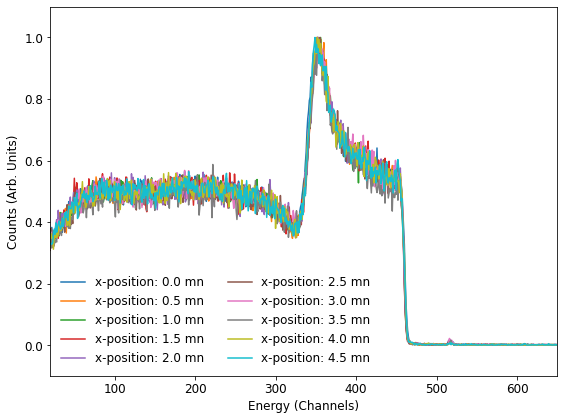

In [10]:
plt.figure(figsize=(8,6))

nspectra = idf_file.get_number_of_spectra()

for i in range(0, nspectra):
    #get the channels and counts
    xx, yy = idf_file.get_dataxy(spectra_id = i)
    
    name = idf_file.get_spectrum_file_name(spectra_id = i)
    
    #plot
    plt.plot(xx, yy, label = name)
    
#set plot details
plt.xlim(20, 650)
plt.ylim(-0.1,1.1)
plt.legend(ncol = 2, frameon = False)
plt.xlabel('Energy (Channels)')
plt.ylabel('Counts (Arb. Units)')
plt.tight_layout()

##

=============== idf_example3_1 ===============
../Example3/idf_example3_1.xml
Miguel Sequeira 

------------------  Notes  ------------------
This file was created during Example 1, it relates to a RBS measurement of a CoPt/SiO2 sample.
Something I did after the first note

------------------ Elements -----------------
nelements 	 3

 - - - Element 0 - - -
name 		 Co 1 Pt 1
density  	 
concentration  	 ['0', '1']
depth 		 ['0', '1000']

 - - - Element 1 - - -
name 		 Si 1 O 2
density  	 
concentration  	 ['0', '1']
depth 		 ['0', '1000']

 - - - Element 2 - - -
name 		 Si
density  	 
concentration  	 ['0', '1']
depth 		 ['300', '1e6']

------------------ Profile -----------------
nlayers 		 2
names 		 ['Co 1 Pt 1', 'Si 1 O 2', 'Si']

 - - - Layer 0 - - -
thickness 		 390
concentrations  	 ['100', '0', '0']

 - - - Layer 1 - - -
thickness 		 550
concentrations  	 ['0', '100', '0']

 - - - Layer 2 - - -
thickness 		 4000000
concentrations  	 ['0', '0', '100']



-------- Spectrum 0 (x-po

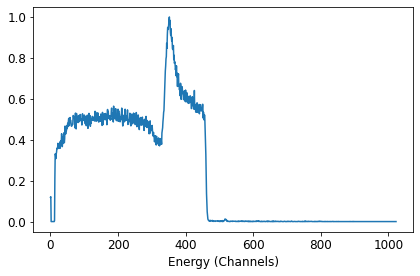

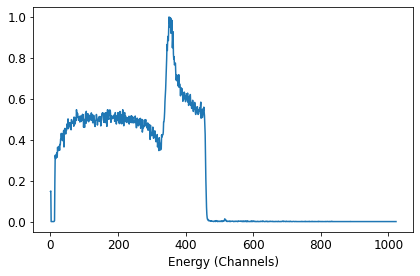

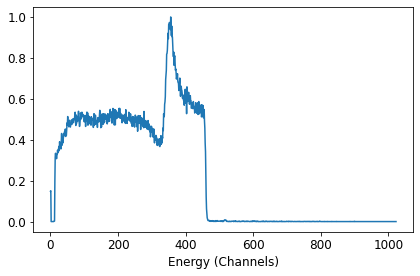

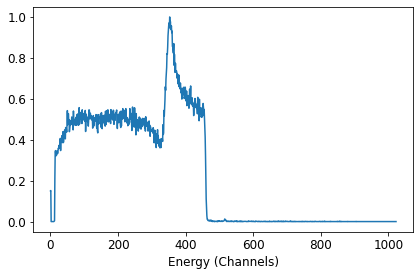

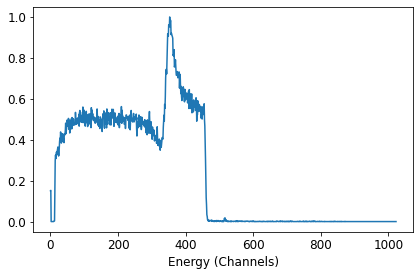

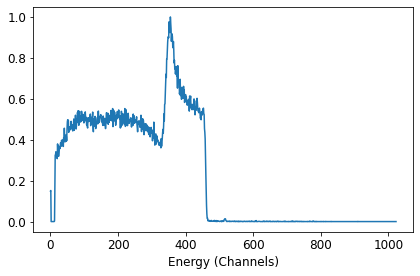

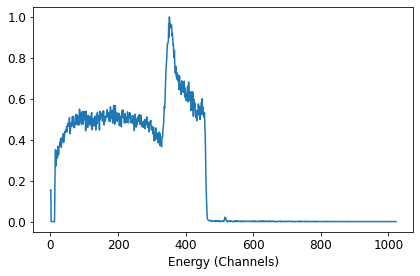

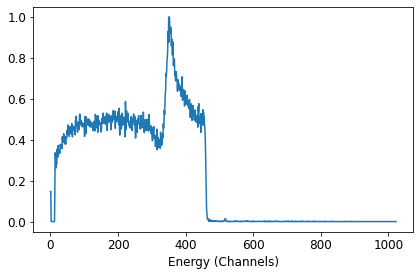

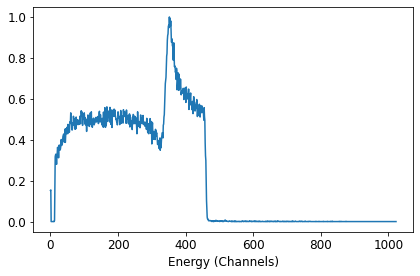

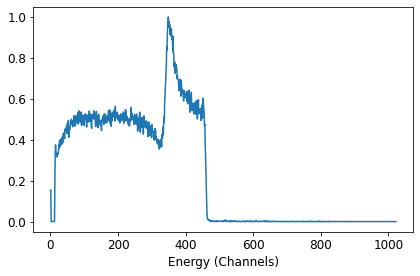

In [11]:
idf_file.print_idf_file()